In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Carregue aqui o dataset
loans = pd.read_csv("..\data\loans.csv")
demogra = pd.read_csv("..\data\Demographics.csv")
accounts = pd.read_csv("..\data\Accounts.csv")
result = pd.read_csv("..\data\ANSWERS.csv")

Podemos usar os métodos `.info()` e `.describe()` para obter informações básicas sobre quantidade presente dos dados, tipos e valores deles.

In [16]:
loans.describe()

ID  PAYMENT_TERM  INSTALLMENT_PERCENT   LOAN_AMOUNT  \
count  3.999000e+03   3975.000000          3974.000000   3981.000000   
mean   6.603562e+05    653.796981             2.981379   3479.168802   
std    3.728332e+05    338.723239             1.121448   2489.961917   
min    9.800000e+01    120.000000             1.000000    250.000000   
25%    3.418460e+05    390.000000             2.000000   1330.000000   
50%    6.670610e+05    651.000000             3.000000   3237.000000   
75%    9.778745e+05    899.000000             4.000000   5334.000000   
max    1.320082e+06   1984.000000             6.000000  11676.000000   

             ALLOW  
count  3999.000000  
mean      0.664166  
std       0.472340  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [17]:
lo_de = loans.merge(demogra)
lo_de = lo_de.dropna()

In [18]:
# lo_de_ac = lo_de.merge(accounts, on='ID', how='left')
lo_de_ac = lo_de.merge(accounts, on='ID')

In [19]:
clean_df = lo_de_ac.copy()

In [20]:
clean_df = clean_df.dropna()

In [21]:
clean_df.count()

ID                            2237
PAYMENT_TERM                  2237
INSTALLMENT_PLANS             2237
INSTALLMENT_PERCENT           2237
LOAN_PURPOSE                  2237
LOAN_AMOUNT                   2237
OTHERS_ON_LOAN                2237
ALLOW                         2237
SEX                           2237
AGE                           2237
JOB_TYPE                      2237
DEPENDENTS                    2237
TELEPHONE                     2237
FOREIGN_WORKER                2237
EMPLOYMENT_DURATION           2237
PROPERTY                      2237
HOUSING                       2237
CURRENT_RESIDENCE_DURATION    2237
CHECKING_BALANCE              2237
CREDIT_HISTORY                2237
EXISTING_SAVINGS              2237
EXISTING_CREDITS_COUNT        2237
dtype: int64

## Tratamento dos dados

In [22]:
clean_df['PAYMENT_TERM'] = clean_df.PAYMENT_TERM.fillna(clean_df.PAYMENT_TERM.mean())
clean_df['INSTALLMENT_PLANS'] = clean_df.INSTALLMENT_PLANS.fillna("NONE")
clean_df['INSTALLMENT_PERCENT'] = clean_df.INSTALLMENT_PERCENT.fillna(clean_df.INSTALLMENT_PERCENT.median())
clean_df['LOAN_PURPOSE'] = clean_df.LOAN_PURPOSE.fillna("NONE")
clean_df['LOAN_AMOUNT'] = clean_df.LOAN_AMOUNT.fillna(clean_df.LOAN_AMOUNT.median())
clean_df['OTHERS_ON_LOAN'] = clean_df.OTHERS_ON_LOAN.fillna("NONE")
clean_df.dropna(subset=['SEX'], inplace=True)
clean_df['AGE'] = clean_df.AGE.fillna(clean_df.AGE.mean())
clean_df['JOB_TYPE'] = clean_df.JOB_TYPE.fillna(clean_df.JOB_TYPE.median())
clean_df['DEPENDENTS'] = clean_df.DEPENDENTS.fillna("0").astype('int64')
clean_df['TELEPHONE'] = clean_df.TELEPHONE.fillna("0").astype('int64')
clean_df['FOREIGN_WORKER'] = clean_df.FOREIGN_WORKER.fillna("0").astype('int64')
clean_df['EMPLOYMENT_DURATION'] = clean_df.EMPLOYMENT_DURATION.fillna("0").astype('int64')
clean_df['PROPERTY'] = clean_df.PROPERTY.fillna("UNKNOWN")
clean_df['HOUSING'] = clean_df.HOUSING.fillna("UNKNOWN")
clean_df['CURRENT_RESIDENCE_DURATION'] = clean_df.CURRENT_RESIDENCE_DURATION.fillna(clean_df.CURRENT_RESIDENCE_DURATION.mean())

In [23]:
# object_columns = ['PAYMENT_TERM','INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
#        'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'AGE',
#        'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
#        'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
#        'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE','CHECKING_BALANCE_n','CREDIT_HISTORY','EXISTING_SAVINGS',
#        'EXISTING_CREDITS_COUNT']
# clean_df = clean_df.drop(object_columns, axis=1)
# clean_df = clean_df.drop('ID', axis=1)

In [24]:
clean_df.INSTALLMENT_PLANS = clean_df.INSTALLMENT_PLANS.map({'NONE':0,'STORES':1,'BANK':2})
clean_df.OTHERS_ON_LOAN = clean_df.OTHERS_ON_LOAN.map({'NONE':0,'CO-APPLICANT':1,'GUARANTOR':2})
clean_df.SEX = clean_df.SEX.map({'M':0,'F':1})
clean_df.PROPERTY = clean_df.PROPERTY.map({'SAVINGS_INSURANCE':0,'CAR_OTHER':1,'REAL_ESTATE':2,'UNKNOWN':3})
clean_df.HOUSING = clean_df.HOUSING.map({'OWN':0,'RENT':1,'FREE':2})
clean_df.LOAN_PURPOSE = clean_df.LOAN_PURPOSE.map({'CAR_USED':0,'CAR_NEW':1,'APPLIANCES':2,'FURNITURE':3,'VACATION':4,'RADIO_TV':5,'OTHER':6,'REPAIRS':7,'RETRAINING':8,'EDUCATION':9,'BUSINESS':10})


<AxesSubplot:>

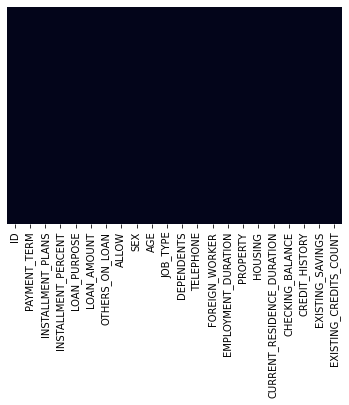

In [25]:
sns.heatmap(clean_df.isnull(),yticklabels=False,cbar=False)

In [26]:
clean_df.CHECKING_BALANCE = clean_df.CHECKING_BALANCE.fillna("NO_CHECKING")
clean_df.CHECKING_BALANCE = clean_df.CHECKING_BALANCE.apply(lambda x: '0' if x == 'NO_CHECKING' else x )
clean_df.CREDIT_HISTORY = clean_df.CREDIT_HISTORY.fillna("UNKNOWN")
clean_df.CREDIT_HISTORY = clean_df.CREDIT_HISTORY.map({'UNKNOWN':0,'NO_CREDITS':1,'OUTSTANDING_CREDIT':2,'PRIOR_PAYMENTS_DELAYED':3,'CREDITS_PAID_TO_DATE':4,'ALL_CREDITS_PAID_BACK':5})
clean_df.EXISTING_SAVINGS = clean_df.EXISTING_SAVINGS.fillna("UNKNOWN")
clean_df.EXISTING_SAVINGS = clean_df.EXISTING_SAVINGS.apply(lambda x: '0' if x == 'UNKNOWN' else x )
clean_df.EXISTING_CREDITS_COUNT = clean_df.EXISTING_CREDITS_COUNT.fillna(-1)
clean_df.CHECKING_BALANCE = clean_df.CHECKING_BALANCE.astype(float).round(0).astype(int)
clean_df.EXISTING_SAVINGS = clean_df.EXISTING_SAVINGS.astype(float).round(0).astype(int)

In [ ]:
clean_df['CHECKING_BALANCE'] = pd.cut(x=clean_df['CHECKING_BALANCE'], bins=[-2800,-2100,-1400,-700,0,700,1400,2100,2800,3500,4200,4900,5600,6300,7000,7700,8400,9100,9800,10500,11200,11900,12600,13300,14000,14700,15400,16100,16800,17500,18200,18900,19600,20300,21000,21700,22400,23100,23800,24500,25200,25900,26600,27300,28000,28700], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44])
clean_df['EXISTING_SAVINGS'] = pd.cut(x=clean_df['EXISTING_SAVINGS'], bins=[-1,0,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000,16500,18000,19500,21000,22500,24000,25500,27000,28500,30000,31500,33000,34500,36000,37500,39000,40500,42000,43500,45000,46500,48000,49500,51000], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34])
clean_df['PAYMENT_TERM'] = pd.cut(x=clean_df['PAYMENT_TERM'], bins=[0, 200, 400, 600, 800, 1000, 1200, 1400,1600,1800,2000], labels=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
clean_df['LOAN_AMOUNT'] = pd.cut(x=clean_df['LOAN_AMOUNT'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [574]:
clean_df.columns

Index(['ID', 'PAYMENT_TERM', 'INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'ALLOW', 'SEX', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
       'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE', 'CREDIT_HISTORY',
       'EXISTING_SAVINGS', 'EXISTING_CREDITS_COUNT'],
      dtype='object')

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, classification_report
feature_select_model = LogisticRegression(max_iter=2000)

In [30]:
X = clean_df.drop(['ALLOW'], axis=1).astype(int)
y = clean_df['ALLOW'].ravel().astype(int)
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
colnames = clean_df.columns

In [31]:
from imblearn.over_sampling import SMOTE as Smote
smt = Smote(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

## Seleção de Features

In [575]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(clean_df[['PAYMENT_TERM', 'INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'ALLOW', 'SEX', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
       'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE', 'CREDIT_HISTORY',
       'EXISTING_SAVINGS', 'EXISTING_CREDITS_COUNT']], 
                 hue='ALLOW', palette='tab20',size=6)
g.set(xticklabels=[]);

C:\Users\a362014\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


## Usando One-Hot Encoding

In [472]:
clean_df = pd.get_dummies(clean_df, columns=['INSTALLMENT_PLANS','OTHERS_ON_LOAN','SEX','PROPERTY','HOUSING',
                   'LOAN_PURPOSE','PAYMENT_TERM','LOAN_AMOUNT','CREDIT_HISTORY','CHECKING_BALANCE','EXISTING_SAVINGS'])

In [ ]:
clean_df.isnull().sum()

In [36]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=8, step=1)
rfe = rfe.fit(X_train, y_train)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['ID', 'PAYMENT_TERM', 'LOAN_AMOUNT', 'AGE', 'EMPLOYMENT_DURATION',
       'CHECKING_BALANCE', 'CREDIT_HISTORY', 'EXISTING_SAVINGS'],
      dtype='object')


In [34]:
model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='auto',
                            random_state=42, n_jobs=11, criterion='entropy', max_depth=22)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# object_columns = ['PAYMENT_TERM','INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
#        'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'AGE',
#        'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
#        'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
#        'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE','CHECKING_BALANCE_n','CREDIT_HISTORY','EXISTING_SAVINGS',
#        'EXISTING_CREDITS_COUNT']
# clean_df = clean_df.drop(object_columns, axis=1)
# clean_df = clean_df.drop('ID', axis=1)

In [433]:
# Acurácia do modelo (com cross validate): 0.8370399337504602
model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='auto',
                            random_state=42, n_jobs=11, criterion='entropy', max_depth=22)

# Acurácia do modelo (com cross validate): 0.8322161391240339
# model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, max_features='auto',
#                              random_state=42, n_jobs=11, criterion='entropy', max_depth=18)

# Acurácia do modelo (com cross validate): 0.827889216047111
# model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, max_features="log2",
#                             random_state=42, n_jobs=11, criterion='entropy')

# model = LogisticRegression(solver='lbfgs', max_iter=4000)

# model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.8070175438596491


In [434]:
from sklearn.model_selection import cross_val_score
acc_cv = cross_val_score(model,X_train, y_train,cv=10,n_jobs=-1, scoring='accuracy')
print(f"Acurácia do modelo (com cross validate): {acc_cv.mean()}")

# np.sqrt(mean_squared_error(y_test, y_pred))

Acurácia do modelo (com cross validate): 0.8315171187881599


Accuracy score = 0.8070175438596491
Mean absolute error = 0.19298245614035087


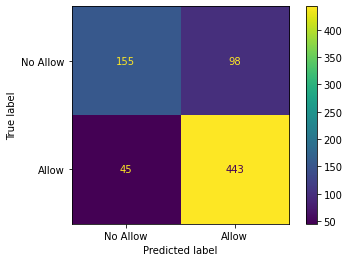

              precision    recall  f1-score   support

    No Allow       0.78      0.61      0.68       253
       Allow       0.82      0.91      0.86       488

    accuracy                           0.81       741
   macro avg       0.80      0.76      0.77       741
weighted avg       0.80      0.81      0.80       741



In [435]:
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test, predictions)}')
print(f'Mean absolute error = {mean_absolute_error(y_test, predictions)}')

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ['No Allow', 'Allow']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_test, predictions, target_names=labels))

